# EXPLORING POOR COUNTRIES INDEX BY WORLD BANK

## Install world bank API

In [2]:
#!pip install wbdata

## Imports

In [177]:
import wbdata as wbd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import iso3166 as iso3166
import math

## Functions

In [178]:
def categorize_poverty(earning_per_day):
    if earning_per_day <= 2.15:
        return 'Poor'
    elif 2.15 < earning_per_day <= 6.85:  # Correct comparison
        return 'Upper-Middle'
    elif earning_per_day > 6.85:
        return 'Rich'
    else:
        return 'N/A'

def is_country(country_name):
    if country_name.lower() in iso3166.countries:
        return 'yes'
    else:
        return 'no'

def population_in_mil(population):
    return round(population / 1000000,2)

## Basic assumptions

[According to World Bank](https://www.worldbank.org/en/topic/measuringpoverty) "The international extreme poverty line is set at 2.15 USD per person per day using 2017 prices. This means that anyone living on less than 2.15 USD a day is in extreme poverty."

In [179]:
# Set up the indicator for poverty 
poverty_indicator = "SI.POV.DDAY"
population_indicator = "SP.POP.TOTL"
df = wbd.get_dataframe(indicators={poverty_indicator: "Poverty Index", population_indicator: "population"}, keep_levels=True)

In [186]:
poverty_df = df[df.index.get_level_values(1) == '2018']

poverty_df = poverty_df.dropna(subset=['Poverty Index'])

poverty_df = poverty_df.reset_index()
poverty_df.rename(columns={'Poverty Index': 'poverty_index'}, inplace=True)
poverty_df = poverty_df.loc[poverty_df['poverty_index'] > 0]
poverty_df['wealth_category'] = poverty_df['poverty_index'].apply(categorize_poverty)
poverty_df['population'] = poverty_df['population'].apply(population_in_mil)
poverty_df['is_country'] = poverty_df['country'].apply(is_country)
poverty_df = poverty_df.loc[(poverty_df['is_country'] == 'yes') & (poverty_df['wealth_category']=='Poor')]

In [187]:

poverty_df.sort_values(by='population',ascending=False).head()

,country,date,poverty_index,population,wealth_category,is_country
84,Russian Federation,2018,0.1,145.40,Poor,yes
67,Mexico,2018,1.9,124.01,Poor,yes
103,Viet Nam,2018,1.2,94.91,Poor,yes
55,Italy,2018,1.5,60.42,Poor,yes
91,Spain,2018,0.8,46.80,Poor,yes


In [188]:
len(poverty_df)

38

In [189]:
300 // len(poverty_df)

7

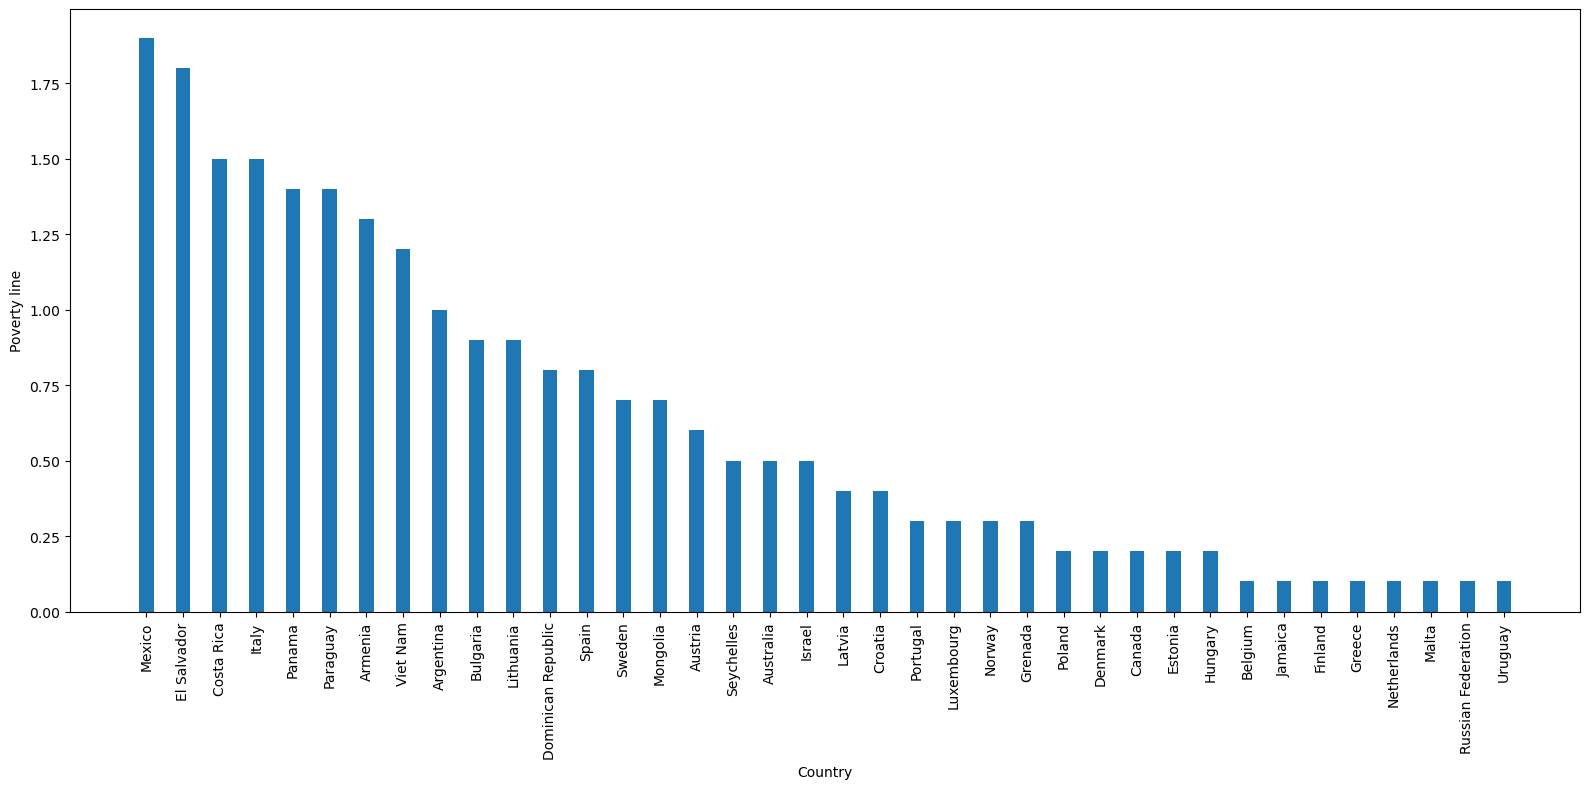

In [194]:
df_sorted = poverty_df.sort_values(by='poverty_index', ascending=False)

fig, ax= plt.subplots(figsize=(16,8))

ax.bar(df_sorted['country'],
       df_sorted['poverty_index'].sort_values(ascending=False),width=.4)
ax.set_xlabel('Country')
ax.set_ylabel('Poverty line')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


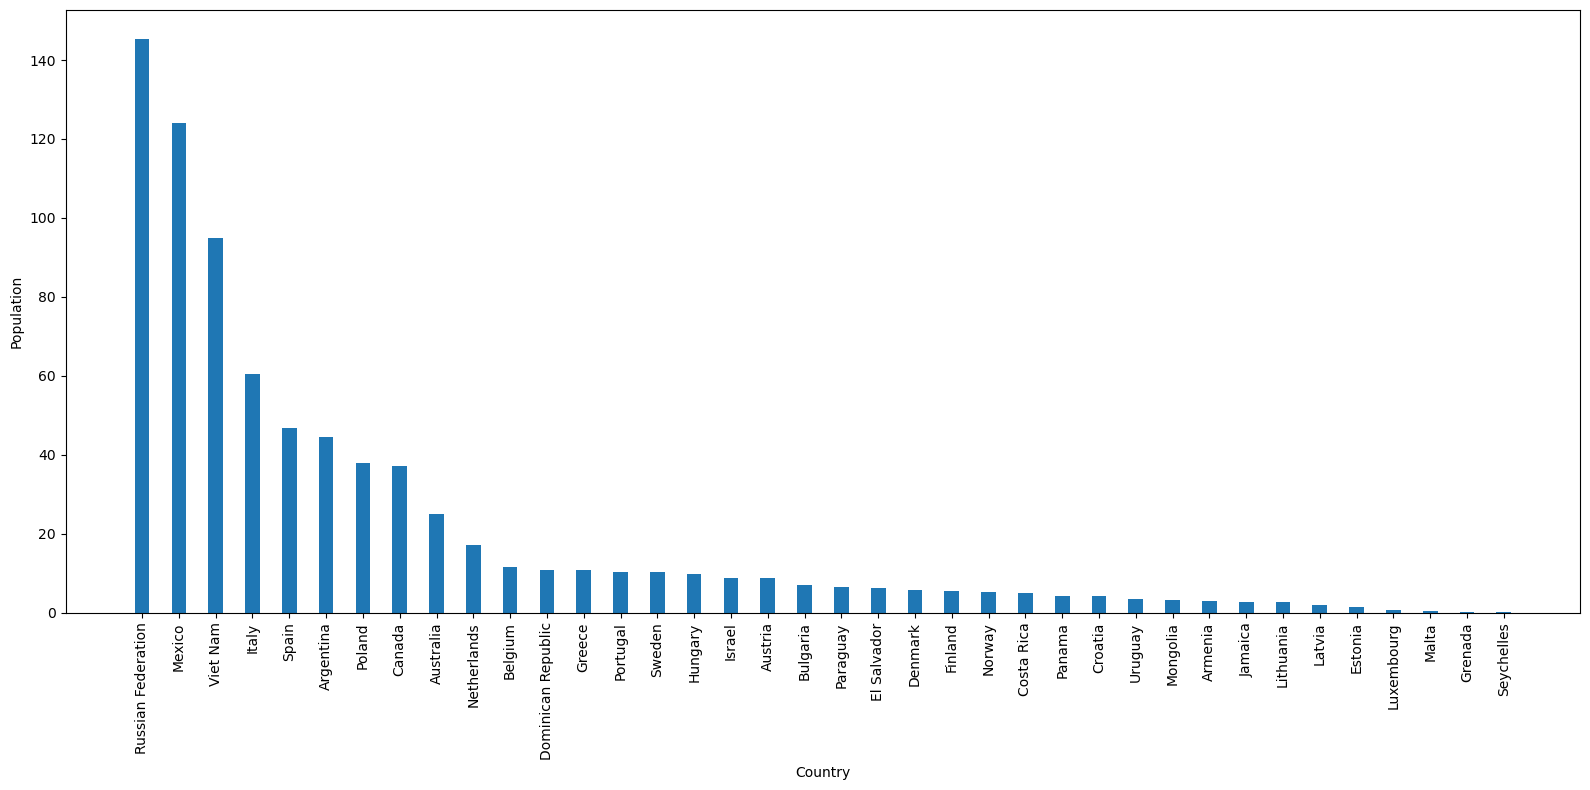

In [192]:
df_sorted = poverty_df.sort_values(by='population', ascending=False)
fig, ax= plt.subplots(figsize=(16,8))

ax.bar(df_sorted['country'],
       df_sorted['population'],width=.4)
ax.set_xlabel('Country')
ax.set_ylabel('Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
